In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [395]:
df = pd.read_csv("all_500.csv")

In [310]:
df.head(1)

,url,title,author,avg_rating,num_ratings,num_reviews,num_pages,opub_year,series,awards,genres,places
0,https://www.goodreads.com/book/show/13496.A_Ga...,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,4.44,"2,206,559",57213,835,Aug-05,True,4,Fantasy,the lands of ice and fire


In [348]:
def clean_title(i):
    sep = '('
    stripped = i.split(sep, 1)[0]
    return stripped
df.title = df.title.apply(clean_title)

In [393]:
def clean_year(i):
    year = []
    for i in df.opub_year:
        if len(i) > 10:
            year.append(i[-4:])
        elif len(i) < 5:
            year.append(i)
        elif i == 'not found':
            year.append('not found')
        else:
            year.append(datetime.strptime(i, '%b-%y').year)
        return year
df.opub_year = df.opub_year.apply(clean_year)
        #print(year)

In [394]:
df.head(1)

,url,title,author,avg_rating,num_ratings,num_reviews,num_pages,opub_year,series,awards,genres,places
0,https://www.goodreads.com/book/show/13496.A_Ga...,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,4.44,"2,206,559",57213,835,[[2005]],True,4,Fantasy,the lands of ice and fire


In [362]:
len(df.opub_year[0])

6

In [364]:
# clean the years

year = []
for i in df.opub_year:
    if len(i) > 10:
        year.append(i[-4:])
    elif len(i) < 5:
        year.append(i)
    elif i == 'not found':
        year.append('not found')
    else:
        year.append(datetime.strptime(i, '%b-%y').year)

year

[2005,
 '2012',
 2007,
 '2010',
 '2014',
 '1990',
 '2006',
 2005,
 '1996',
 '2006',
 2003,
 '2003',
 '2007',
 '2004',
 '2005',
 '2003',
 '1986',
 '2004',
 '1994',
 '1994',
 '2001',
 '1996',
 2009,
 '2011',
 '2009',
 '1988',
 '2008',
 '2006',
 '2014',
 '2005',
 '2003',
 '2006',
 '1988',
 '2012',
 '2005',
 '1979',
 2005,
 '2010',
 2002,
 '2002',
 '1997',
 '2011',
 '2005',
 1999,
 '2009',
 '1999',
 '1987',
 1999,
 '2006',
 1993,
 '2001',
 '1992',
 '2007',
 '2007',
 1987,
 '2007',
 1987,
 '2007',
 '2004',
 '2003',
 '2003',
 '2006',
 '2002',
 '1995',
 '1993',
 '2012',
 '2006',
 '2008',
 '1987',
 '2006',
 '2003',
 '1987',
 '1992',
 2001,
 '2005',
 '2003',
 '2012',
 '1988',
 2008,
 '1986',
 '2002',
 '2009',
 '2008',
 1990,
 '2005',
 '2000',
 '2008',
 '2000',
 '1990',
 '1987',
 '2008',
 1999,
 '1989',
 '2005',
 '2005',
 '2020',
 '1992',
 '2021',
 '2005',
 1995,
 '2007',
 1988,
 '1991',
 '1999',
 '2002',
 2004,
 '2013',
 '1994',
 '2013',
 '2005',
 '2004',
 '2002',
 1996,
 '1996',
 '2009',
 '197

In [312]:
#replace not found with none? not zero?
# replcaing 'not found' in reviews col.
#df['num_reviews'] = df['num_reviews'].replace(['not found'],'0')
#df['genres'] = df['genres'].replace(['not found'],'0')
df = df.replace(['not found'],'None') # replace zero with average?

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          500 non-null    object 
 1   title        500 non-null    object 
 2   author       500 non-null    object 
 3   avg_rating   500 non-null    float64
 4   num_ratings  500 non-null    object 
 5   num_reviews  500 non-null    object 
 6   num_pages    500 non-null    object 
 7   opub_year    500 non-null    object 
 8   series       500 non-null    object 
 9   awards       500 non-null    object 
 10  genres       500 non-null    object 
 11  places       493 non-null    object 
dtypes: float64(1), object(11)
memory usage: 47.0+ KB


In [314]:
df.opub_year.head(5)

0                 Aug-05
1    September 25th 2012
2                 Apr-07
3       August 31st 2010
4                   2014
Name: opub_year, dtype: object

In [306]:
df.opub_year[0]

'Aug-05'

In [341]:
year = []
year_tbd = []
for i in df.opub_year:
    if len(i) > 10:
        year.append(i[-4:])
    elif len(i) < 5:
        year.append(i)
    elif i == 'not found':
        year.append('not found')
    else:
        year.append(datetime.strptime(i, '%b-%y').year)
    print(year)

[2005]
[2005, '2012']
[2005, '2012', 2007]
[2005, '2012', 2007, '2010']
[2005, '2012', 2007, '2010', '2014']
[2005, '2012', 2007, '2010', '2014', '1990']
[2005, '2012', 2007, '2010', '2014', '1990', '2006']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005]
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003]
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003, '2003']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003, '2003', '2007']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003, '2003', '2007', '2004']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003, '2003', '2007', '2004', '2005']
[2005, '2012', 2007, '2010', '2014', '1990', '2006', 2005, '1996', '2006', 2003, '2003', '2007', '2004', '2

In [320]:
year = []
year_tbd = []
for i in df.opub_year:
    if len(i) > 10:
        year.append(i[-4:])
    elif len(i) < 5:
        year.append(i)
    else:
        year_tbd.append(i)
    print(year_tbd)

['Aug-05']
['Aug-05']
['Aug-05', 'Apr-07']
['Aug-05', 'Apr-07']
['Aug-05', 'Apr-07']
['Aug-05', 'Apr-07']
['Aug-05', 'Apr-07']
['Aug-05', 'Apr-07', 'Apr-05']
['Aug-05', 'Apr-07', 'Apr-05']
['Aug-05', 'Apr-07', 'Apr-05']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03', 'Jan-09']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03', 'Jan-09']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03', 'Jan-09']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03', 'Jan-09']
['Aug-05', 'Apr-07', 'Apr-05', 'Jul-03', 'Jan-09']
['Aug-05', 'Apr-07', 'Apr-05', 'J

In [293]:
#df.opub_year[1][-4:]
year = []
for i in df.opub_year:
    if len(i) > 10:
        print(i[-4:])
    elif len(i) < 5:
        print(i)
    else:
        print('not found')       

not found
2012
not found
2010
2014
1990
2006
not found
1996
2006
not found
2003
2007
2004
2005
2003
1986
968)
1994
1994
2001
1996
not found
2011
2009
1988
2008
2006
2014
2005
2003
2006
1988
2012
2005
1979
not found
2010
not found
2002
1997
2011
2005
not found
2009
1999
1987
not found
2006
not found
2001
1992
2007
2007
not found
2007
not found
2007
2004
2003
2003
2006
2002
1995
1993
2012
2006
2008
1987
2006
2003
1987
1992
not found
2005
2003
2012
1988
not found
1986
2002
2009
2008
not found
2005
2000
2008
2000
1990
1987
2008
not found
1989
2005
2005
2020
1992
2021
2005
not found
2007
not found
1991
1999
2002
not found
2013
1994
2013
2005
2004
2002
not found
1996
2009
1976
not found
2010
2009
1993
2006
2011
2009
2007
2005
2005
2002
2002
2009
2005
2006
2001
1995
2008
2007
2007
2014
2011
2008
2005
1993
2009
2011
2017
2001
2015
2001
2012
2011
not found
not found
2012
2002
014)
2020
2008
2012
2011
not found
2007
1993
2001
2014
2006
2002
2004
2011
2012
2007
2000
2006
2011
2008
2012
2005
2004


TypeError: object of type 'float' has no len()

In [274]:
#df['year'] = pd.DatetimeIndex(df['opub_year']).year
df_year = str(df.opub_year)
#dt = datetime.strptime(df_year, '%Y-%m-%d')
dt = pd.DatetimeIndex(df['opub_year']).year

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-08-05 00:00:00

In [245]:
# insert top 10 books with most awards (genres here)
df1 = df.sort_values('awards',ascending = False).head(1)
df1

,url,title,author,avg_rating,num_ratings,num_reviews,num_pages,opub_year,series,awards,genres,places,minmax_norm_ratings,mean_norm_ratings
303,https://www.goodreads.com/book/show/395962.Kus...,Kushiel's Chosen,Jacqueline Carey,4.27,38840.0,1064,563,May 1st 2005,True,9,Young Adult,italy,6.166,1.691


In [246]:
def min_max_norm_rating(book, x):
        max_rating = book[x].max()
        min_rating = book[x].min()
        range_of_ratings = max_rating - min_rating
        book['minmax_norm_ratings'] = round(1 + 9*((book[x] - min_rating)/range_of_ratings) , 3)
        mean_rating = df['avg_rating'].mean()
        book['mean_norm_ratings'] = round(1 + 9*((book[x] - mean_rating)/range_of_ratings) , 3)
        return book

min_max_norm_rating(df, 'avg_rating')

,url,title,author,avg_rating,num_ratings,num_reviews,num_pages,opub_year,series,awards,genres,places,minmax_norm_ratings,mean_norm_ratings
0,https://www.goodreads.com/book/show/13496.A_Ga...,A Game of Thrones,George R.R. Martin,4.44,2206559.0,57213,835,Aug-05,True,4,Fantasy,the lands of ice and fire,7.071,2.596
1,https://www.goodreads.com/book/show/30.J_R_R_T...,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60,120992.0,1959,1728,September 25th 2012,True,,Fantasy,middle-earth (78),7.923,3.448
2,https://www.goodreads.com/book/show/186074.The...,The Name of the Wind,Patrick Rothfuss,4.52,816628.0,46948,662,Apr-07,True,8,Fantasy,,7.497,3.022
3,https://www.goodreads.com/book/show/7235533-th...,The Way of Kings,Brandon Sanderson,4.63,370311.0,,1007,August 31st 2010,True,4,Fantasy,roshar,8.083,3.608
4,https://www.goodreads.com/book/show/11127.The_...,The Chronicles of Narnia,C.S. Lewis,4.26,579058.0,11210,767,2014,True,,Fantasy,"london, england (389)",6.112,1.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.goodreads.com/book/show/25729807-d...,Doctors in Hell,Janet E. Morris,4.73,67.0,9,338,June 22nd 2015,True,,Fantasy,,8.615,4.141
496,https://www.goodreads.com/book/show/215542.The...,The Rivers of Zadaa,D.J. MacHale,4.20,23790.0,370,405,Jun-06,True,,Fantasy,,5.793,1.318
497,https://www.goodreads.com/book/show/160859.Sha...,Shadow Moon,George Lucas,3.30,2125.0,186,452,Aug-96,True,,Fantasy,,1.000,-3.475
498,https://www.goodreads.com/book/show/437788.Son...,Song of the Beast,Carol Berg,4.04,2336.0,167,467,May 6th 2003,True,1,Fantasy,,4.941,0.466


In [247]:
def nrt(data, rt):
        if rt is not None:
            data[rt] = data[rt].str.replace(',', '').astype(float)
            
            return data
        else:
            return np.NaN

nrt(df, 'num_ratings')
nrt(df, 'num_reviews')

AttributeError: Can only use .str accessor with string values!

In [248]:
#group by og pub year and get mean of the ratings for the year groups - see which year did best
# Mean of minmax_norm_ratings for every year of publishing
df.groupby('opub_year').agg({"minmax_norm_ratings": [lambda x: np.mean(x)]})

,minmax_norm_ratings
,<lambda>
opub_year,
,8.109
May 20th 2012,4.036
(first published July 15th 2014),2.278
1979,6.592
1985,4.994
...,...
September 4th 2006,5.367
September 5th 2003,5.420


In [259]:
#show author with highest ratings (top 10)
df2 = df.sort_values('avg_rating',ascending = False).head(10)
df2
#sb.countplot(data = df2, x='author')

,url,title,author,avg_rating,num_ratings,num_reviews,num_pages,opub_year,series,awards,genres,places,minmax_norm_ratings,mean_norm_ratings
403,https://www.goodreads.com/book/show/58441523-t...,The Return of the Knights,Gregory Kontaxis,4.99,95.0,,505,February 5th 1998,True,1,Fantasy,gormenghast,10.000,5.525
265,https://www.goodreads.com/book/show/58990727-t...,The Coven of Deeds,Malcolm McCoard,4.88,25.0,2,475,July 23rd 2021,False,,,,9.414,4.939
475,https://www.goodreads.com/book/show/35251468-g...,Greenstone,C.E. Johnson,4.88,65.0,6,466,May 27th 2017,True,,Young Adult,,9.414,4.939
276,https://www.goodreads.com/book/show/50281680-m...,Murder in the Coven: Maya's Magical Adventures...,Malcolm McCoard,4.86,28.0,0,141,December 30th 2019,False,,,NaN,9.308,4.833
279,https://www.goodreads.com/book/show/54267027-t...,They came from the north,Malcolm McCoard,4.85,26.0,2,,,,,,,9.254,4.780
471,https://www.goodreads.com/book/show/38332472-b...,Blackstone,C.E. Johnson,4.84,19.0,1,441,February 1st 2018,True,,,,9.201,4.726
466,https://www.goodreads.com/book/show/17450513-h...,Hunt for the Star,Dane Richter,4.83,47.0,24,550,March 14th 2015,True,,Fantasy,,9.148,4.673
282,https://www.goodreads.com/book/show/56177889-m...,Mischief and the Guardian Cats,Malcolm McCoard,4.78,27.0,1,506,July 1st 1995,True,3,Fantasy,,8.882,4.407
274,https://www.goodreads.com/book/show/48557706-t...,The Curse of Cardoness: Maya's Magical Adventu...,Malcolm McCoard,4.77,30.0,2,212,September 28th 2019,False,,,NaN,8.828,4.354
470,https://www.goodreads.com/book/show/34442170-t...,Twelve Weapons,James Dwyer,4.75,20.0,4,566,April 15th 1993,True,1,Fantasy,,8.722,4.247


<AxesSubplot:xlabel='series', ylabel='count'>

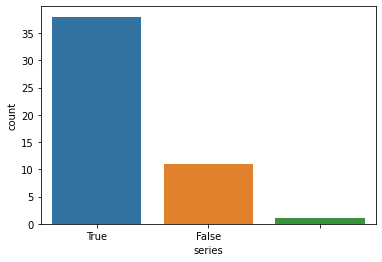

In [250]:
#Which 50 books should i stock up as a bookstore and should it be part of a series or no series?
#top 5 books by ratings
df3 = df.sort_values('avg_rating',ascending = False).head(50)
#df3[["title", "avg_rating","series"]]
# percentage of top 50 books that are series and those that are not
sb.countplot(data = df3, x='series')

<AxesSubplot:xlabel='series', ylabel='count'>

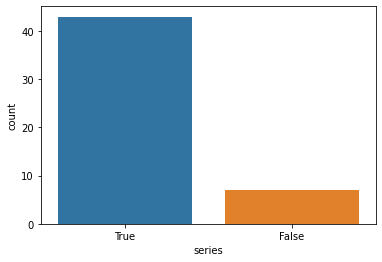

In [130]:
# top 5 books by awards
df4 = df.sort_values('awards',ascending = False).head(50)
sb.countplot(data = df4, x='series')

In [260]:
# authors that occured more than once and what year they published? or decade and their ratings? awards?
df_author =df.author.value_counts()
df_author.head(5)
#df_author.head(10)
#df[['author', 'title']]
#df3[["title", "avg_rating","series"]]

Robert Jordan        15
Robin Hobb           13
Brandon Sanderson    11
David Eddings        10
Terry Brooks         10
Name: author, dtype: int64

In [ ]:
#df[df1[‘col1’] == value]
df[df1[‘col1’] < value]

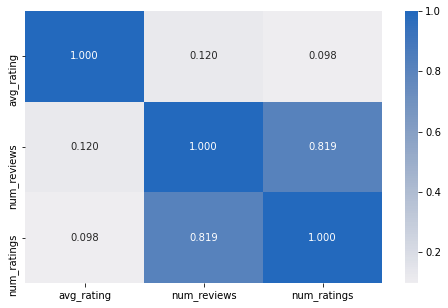

In [148]:
# heatmap showing correlations
numeric_vars = ['avg_rating', 'num_reviews', 'num_ratings', 'num_pages','series']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


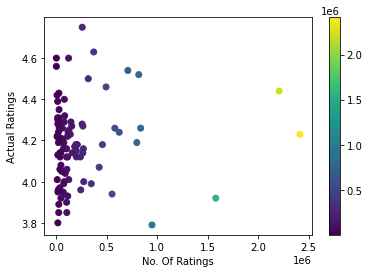

In [261]:
def get_plot_nrvsar(data):

    g = plt.scatter(data.num_ratings, data.avg_rating, c= data.num_ratings)
    plt.xlabel('No. Of Ratings')
    plt.ylabel('Actual Ratings')
    plt.colorbar(g)

get_plot_nrvsar(data)

ConversionError: Failed to convert value(s) to axis units: 0                   Aug-05
1      September 25th 2012
2                   Apr-07
3         August 31st 2010
4                     2014
              ...         
495         June 22nd 2015
496                 Jun-06
497                 Aug-96
498           May 6th 2003
499                 Aug-99
Name: x, Length: 500, dtype: object

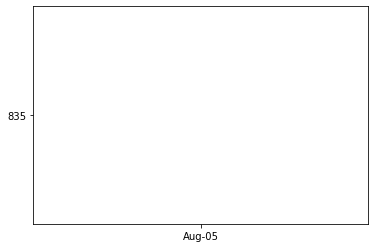

In [262]:
# number of pages over the years
sb.lineplot(data=df, x='opub_year', y='num_pages')